Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Есть небольшие недочеты, но думаю у тебя не составить труда их исправить
- Жду обновленную работу!


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем и изучим данные по скважинам в трех регионах.

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>



In [20]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

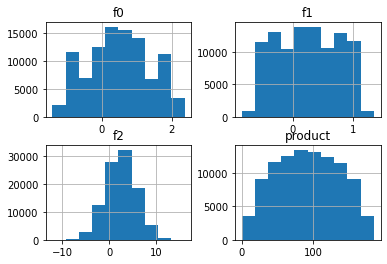

In [21]:
display(data_0.head())
data_0.hist()
data_0.isnull().sum()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

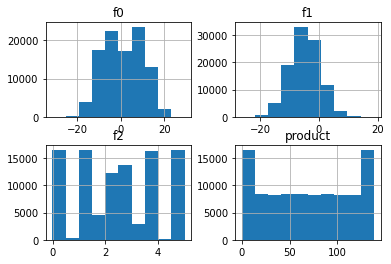

In [22]:
display(data_1.head())
data_1.hist()
data_1.isnull().sum()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

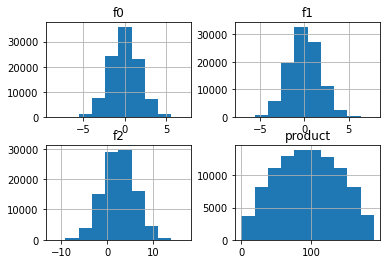

In [23]:
display(data_2.head())
data_2.hist()
data_0.isnull().sum()

Пропущенных значений в данных нет, но распределение признаков сильно различается, поэтому в дальнейшем проведем процедуру масштабирования при постоении моделей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены, но можно было бы еще как минимум изучить корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Спасибо, добавила проверку на мультиколлинеарность.
</div>

Проверим данные на мультиколлинеарность, рассчитав коэффициент инфляции дисперсии (VIF).

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num = 0  
for data in [data_0, data_1, data_2]:
    X = data.drop(['id', 'product'], axis = 1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(len(X.columns))]
    num += 1
    print('Регион {0}'.format(num))
    print(vif_data)
    print()


Регион 1
  feature       VIF
0      f0  1.157011
1      f1  1.135999
2      f2  1.231342

Регион 2
  feature       VIF
0      f0  1.027316
1      f1  1.494591
2      f2  1.507561

Регион 3
  feature  VIF
0      f0  1.0
1      f1  1.0
2      f2  1.0



Для всех признаков VIF около единицы, значит признаки не коррелируют.


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт

## Обучение и проверка модели

Для каждого региона разобъем данные на обучающую и валидационную выборку (75:25), масштабируем признаки, обучим модели. Затем посчитаем среднеквадратическую ошибку и средний запас сырья.

In [7]:
def model_creator(data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    # scaling
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    # model fit
    model = LinearRegression().fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    # result
    rmse = mean_squared_error(predictions_valid, target_valid)**0.5
    average_product = sum(predictions_valid) / len(predictions_valid)
    print("RMSE для региона", ':', rmse)
    print('Средний запас:', average_product)
    return (pd.Series(predictions_valid), pd.Series(target_valid.reset_index(drop=True)), rmse)


<div class="alert alert-block alert-success">
<b>Успех:</b> Масштабирование проведено корректно
</div

In [8]:
print('Регион 1')
predictions_1, target_valid_1, rmse_1 = model_creator(data_0)

Регион 1
RMSE для региона : 37.5794217150813
Средний запас: 92.59256778438008


In [9]:
print('Регион 2')
predictions_2, target_valid_2, rmse_2 = model_creator(data_1)

Регион 2
RMSE для региона : 0.893099286775617
Средний запас: 68.7285468954458


In [10]:
print('Регион 3')
predictions_3, target_valid_3, rmse_3 = model_creator(data_2)

Регион 3
RMSE для региона : 40.02970873393434
Средний запас: 94.96504596800506


Лучше всего обучились модель второго региона с ошибкой около тысячи рублей, а для регионов 1 и 3 среднеквадратическая ошибка составила около 38 и 40 тысяч рублей соответственно. Средний запас предсказанного сырья составил 92.6, 68.7 и 94.7 тысяч баррелей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 


## Подготовка к расчёту прибыли

Расчитаем объем сырья для безубыточной разработки скважины.

In [11]:
one_bar_revenue = 450000
budget = 10000000000
best_wells_n = 200
overall_wells = 500


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `10_000_000_000`.
</div> 

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо, учту!
</div>

In [12]:
bep = round(budget / one_bar_revenue, 2)
print('Точка безубыточности:', bep, 'тысяч баррелей') 

Точка безубыточности: 22222.22 тысяч баррелей


Найдем средний объем нефти для безубыточной добычи в 200 лучших скважинах. 

In [13]:
print('Точка безубыточности для 200 скважин:', bep / best_wells_n, 'тысяч баррелей')

Точка безубыточности для 200 скважин: 111.11110000000001 тысяч баррелей


Сравним со средним запасом нефти в скважинах по каждому региону.

Для безубыточного функционирования в скважине минимально должно быть 111 тысяч баррелей нефти. Это больше, чем средний запас нефти в скважинах во всех регионах, где он составил 92.6, 68.7 и 94.7 тысяч баррелей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>

## Расчёт прибыли и рисков 

Напишем функцию расчета прибыли и посмотрим среднюю прибыль с 200 лучших скважин в каждом регионе.

In [14]:
def profit(predictions, target):
    max_predictions = predictions.sort_values(ascending = False)
    max_target = target[max_predictions.index][:200]
    revenue = max_target.sum() * one_bar_revenue
    return revenue - budget    

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>

In [15]:
i = 0
for pred, targ in zip([predictions_1, predictions_2, predictions_3],
               [target_valid_1, target_valid_2, target_valid_3]):
    i += 1
    print('Прибыль 200 лучших скважин для региона {0}:'.format(i), round(profit(pred, targ), 2))

Прибыль 200 лучших скважин для региона 1: 3320826043.14
Прибыль 200 лучших скважин для региона 2: 2415086696.68
Прибыль 200 лучших скважин для региона 3: 2710349963.6


Проведем Bootstrap для распределения прибыли, применив функцию расчета прибыли.

In [16]:
state = np.random.RandomState(12345)

def risk_check(predictions, target):
    revenue = []
    for i in range(1000):
        target_subsample = target.sample(n = overall_wells, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        revenue.append(profit(probs_subsample, target_subsample))
    revenue = pd.Series(revenue)
    lower = revenue.quantile(0.025)
    upper = revenue.quantile(0.975)
    mean_revenue = sum(revenue) / len(revenue)
    risk = st.percentileofscore(revenue, 0)
    return round(lower,2), round(upper,2), round(mean_revenue, 2), round(risk, 2)


<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке, метрики считаются верным образом!  
</div>


In [17]:
i = 0
for pred, targ in zip([predictions_1, predictions_2, predictions_3],
               [target_valid_1, target_valid_2, target_valid_3]):
    lower, upper, mean_rev, risk = risk_check(pred, targ)
    i += 1
    print('### Регион {0} ###'.format(i))
    print('95% доверительный интервал:', lower, upper)
    print('Средний доход:', mean_rev)
    print('Риски:', risk)
    print()

### Регион 1 ###
95% доверительный интервал: -102090094.84 947976353.36
Средний доход: 425938526.91
Риски: 6.0

### Регион 2 ###
95% доверительный интервал: 128123231.43 953612982.07
Средний доход: 518259493.7
Риски: 0.3

### Регион 3 ###
95% доверительный интервал: -115852609.16 989629939.84
Средний доход: 420194005.34
Риски: 6.2



Второй регион имеет самые низкие риски (0.3%) и самую высокую прибыль (518 миллионов) - он подходит под условие проекта. Риски остальных регионов выше 2.5%.


<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  Если 0.3 - это 30%, то 6.0 - это 600%?) 
    
Обнови, пожалуйста выводы - ты не правильно интепретировала риски. Если риски больше, чем 2.5%  - то левая граница доверительного интервала будет отрицательной.
    

</div> 

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Ох, да, все перепутала под конец) Заменила выводы.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично, проведено детальное исследование и был выбран правильный регион!

## Общий вывод

Целью проекта было определить регион с вероятностью убытков при разработке менее 2.5% и наибольшей прибылью. 

Сначала мы исследовали данные, проверили их на пропущенные значения и постоили гистограммы, из которых определили, что признаки нужно будет масштабировать перед обучением модели. Также мы убедились, что признаки не коррелируют. Далее мы обучили модели линейной регрессии для каждого региона и определили среднеквадратическую ошибку и средний запас нефти в скважинах. 

Далее определив точку безубыточности в 111 тысяч баррелей для каждой из 200 теоретических лучших скважин мы выяснили, что запас нефти в среднем ниже, чем точка безубыточности. Затем мы отсортировали предсказания моделей и выбрали 200 самых доходных скважин для каждого региона. Для них мы провели процедуру Bootstrap и посчитали 95% интервал, средний доход и риски.

Единственным регионом с уровнем рисков ниже 2,5% стал второй регион. Этот регион можно выбрать для разработки скважин - его прогнозируемая средняя прибыль составит около 518 миллионов.


<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован